# Project: [Wrangle-and-Analyze-Data]

## Table of Contents
<ul>
<li><a href="#ASSESSING">ASSESSING</a></li>
<li><a href="#eda">CLEANING</a></li>
<li><a href="#conclusions">VISUALISATION</a></li>
</ul>

In [274]:
#importing necessary libraries
import pandas as pd
import numpy as np
import os
import json
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer
%matplotlib inline

In [275]:
#reading my csv file
twitter_archive=pd.read_csv('twitter-archive-enhanced.csv')

In [276]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [277]:
#reading my html file
url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response= requests.get(url)
with open('image-prediction.tsv', mode='wb') as file:
    file.write(response.content)

In [278]:
image_prediction= pd.read_csv('image-prediction.tsv' ,sep='\t')
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Below, are the codes I ought to use to query twitter API. But I was not granted the developer tools so I will comment them out

In [279]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These should be my twitter hidden key
#api_key = 'HIDDEN'
#api_key_secret = 'HIDDEN'
#access_token = 'HIDDEN'
#access_token_secret = 'HIDDEN'

#auth = OAuthHandler(api_key, api_key_secret)
#auth.set_access_token(access_token, access_token_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True)
#tweet_ids =twitter_archive.tweet_id.values
#len(tweet_ids)



In [280]:
#  Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This is the loop to save myb date
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)

In [281]:
#  read the data into  dataframe
# tweet_json=[]
# with open ('tweet_json.text', encoding='utf-8') as file
#     for item in file.readlines():
#         item= json.loads(item)
#         tweet_id=item['id']
#         day_created=item['created_at'][:3]
#         text=item['full_text']
#         retweet_count=item['retweet_count']
#         favourite_count=item['favorite_count']
        
#         tweet_data.append({'tweet_id':tweet_id,'weekdays':day_created,
#                           'text':text,'retweet_count':retweet_counts,'favorite_count':favorite_counts})
        
#         tweet_data= pd.DataFrame(tweet_data, columns=['tweet_id','weekdays','text', 'retweet_count','favorite_count'])

In [282]:
#reading my json file
tweet_json= pd.read_json('tweet-json.txt', lines=True)

tweet_json=tweet_json[['id', 'favorite_count', 'retweet_count']]
tweet_json.head()

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


<a id='ASSESSING'></a>

# ASSESSING 

In [283]:
#displaying maximum row and column
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_row',None)

#### ASSESSING TWITTER_ARCHIVE

In [284]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [285]:
twitter_archive['puppo'].nunique()

2

In [286]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [287]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [288]:
twitter_archive.retweeted_status_id.isnull().sum()

2175

In [289]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [290]:
twitter_archive.rating_denominator.value_counts().head()

10    2333
11       3
50       3
20       2
80       2
Name: rating_denominator, dtype: int64

In [291]:
twitter_archive.name.value_counts().head()

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Name: name, dtype: int64

In [292]:
twitter_archive.tweet_id.duplicated().sum()

0

### B. ASSESSING IMAGE_PREDICTION


In [293]:
image_prediction.head(9)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True


In [294]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [295]:
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [296]:
image_prediction.tweet_id.duplicated().sum()

0

In [297]:
image_prediction['p1'].value_counts().head()


golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
Name: p1, dtype: int64

In [298]:
image_prediction['p2'].value_counts().head()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
Name: p2, dtype: int64

In [299]:
image_prediction['p3'].value_counts().head()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
Name: p3, dtype: int64

### ASSESSING TWEET_JSON

In [300]:
tweet_json.head()

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [301]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [302]:
tweet_json.describe()

,id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


### Quality issues

1.Dropping of erroneous column (reply,status id retweeted_status,timestamp, retweeted_status,user id, columns has nul values)

2.Timestamp has no correct datatype

3.Tweet id is of int datatype instead of strings

4.Renaming the values in p1, p2 and p3 in the image_prediction dataset

5.Convert timestamp to datetime datatype

6.Convert rating_numerator to float datatype

7.Replacing 'none' value in names as NaN

8.Remove retweet and drop  the column

9.Deleting misssing photos from some ID



### TIDINESS ISSUES
1.doggo,floofer, pupper and puppo are types of dogs and shuod be repersented by one column

2.The three data set should be in one dataset

<a id='eda'></a>
## CLEANING

In [303]:
# Making a copy of my dataset
clean_ta = twitter_archive.copy()
clean_ip = image_prediction.copy()
clean_tj = tweet_json.copy()

#### Define 
1.Dropping of erroneous columns

#### code 

In [304]:
columns=['in_reply_to_status_id','in_reply_to_user_id', 'retweeted_status_user_id','retweeted_status_timestamp','expanded_urls','source']
clean_ta.drop(columns,axis=1 ,inplace=True)

#### Test

In [230]:
clean_ta.head()

,tweet_id,timestamp,text,retweeted_status_id,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,12,10,Franklin,None,None,None,None


#### Define
tidiness issues(1)

2.Merging the three datasets


#### Code

In [231]:
clean_tj.rename( columns={'id':'tweet_id' } ,inplace=True) 

In [232]:
clean_merge=pd.merge(clean_ta,clean_tj,on='tweet_id',how='left')

In [233]:
clean_merge=pd.merge(clean_merge,clean_ip,on='tweet_id',how='left')

##### Test

In [234]:
clean_merge.head()

,tweet_id,timestamp,text,retweeted_status_id,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,13,10,Phineas,None,None,None,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,13,10,Tilly,None,None,None,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,12,10,Archie,None,None,None,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,13,10,Darla,None,None,None,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24 +0000,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,12,10,Franklin,None,None,None,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


#### Define 
tidiness issues(2)

3.Melting doggo|floofer|pupper|puppo into one column


#### Code

In [235]:
clean_merge['dog_type'] = clean_merge['text'].str.extract('(doggo|floofer|pupper|puppo)')

#### Test 


In [265]:
clean_merge.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,10,Phineas,39467.0,8853.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13.0,10,Tilly,33819.0,6514.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12.0,10,Archie,25461.0,4328.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13.0,10,Darla,42908.0,8964.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper towel,0.170278,False,Labrador retriever,0.168086,True,spatula,0.040836,False,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12.0,10,Franklin,41048.0,9774.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English springer,0.225770,True,German short-haired pointer,0.175219,True,NaN


In [237]:
clean_merge.dog_type.value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: dog_type, dtype: int64

In [238]:
#crosschecking to see if my data is correct
clean_merge[['dog_type', 'doggo', 'floofer', 'pupper', 'puppo']].sample(10)

,dog_type,doggo,floofer,pupper,puppo
1682,pupper,None,None,pupper,None
1959,NaN,None,None,None,None
1523,NaN,None,None,None,None
200,doggo,doggo,floofer,None,None
685,NaN,None,None,None,None
1758,NaN,None,None,None,None
1280,NaN,None,None,None,None
83,doggo,None,None,None,None
367,NaN,None,None,None,None
955,NaN,None,None,None,None


In [239]:
columns=['doggo','floofer','pupper','puppo']
clean_merge.drop(columns,axis=1 ,inplace=True)

In [266]:
clean_merge.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,10,Phineas,39467.0,8853.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13.0,10,Tilly,33819.0,6514.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12.0,10,Archie,25461.0,4328.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13.0,10,Darla,42908.0,8964.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper towel,0.170278,False,Labrador retriever,0.168086,True,spatula,0.040836,False,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12.0,10,Franklin,41048.0,9774.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English springer,0.225770,True,German short-haired pointer,0.175219,True,NaN


#### Define

4. convert tweet_id to strings


#### Code

In [241]:
clean_merge.tweet_id=clean_merge.tweet_id.astype(str)

#### Test

In [242]:
clean_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tweet_id             2356 non-null   object 
 1   timestamp            2356 non-null   object 
 2   text                 2356 non-null   object 
 3   retweeted_status_id  181 non-null    float64
 4   rating_numerator     2356 non-null   int64  
 5   rating_denominator   2356 non-null   int64  
 6   name                 2356 non-null   object 
 7   favorite_count       2354 non-null   float64
 8   retweet_count        2354 non-null   float64
 9   jpg_url              2075 non-null   object 
 10  img_num              2075 non-null   float64
 11  p1                   2075 non-null   object 
 12  p1_conf              2075 non-null   float64
 13  p1_dog               2075 non-null   object 
 14  p2                   2075 non-null   object 
 15  p2_conf              2075 non-null   f

#### Define

5. convert timestamp to datetime
5. convert rating_numerator to float


#### Code

In [243]:
clean_merge.timestamp=pd.to_datetime(clean_merge['timestamp'])
clean_merge.rating_numerator=clean_merge.rating_numerator.astype(float)

##### Test

In [244]:
clean_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   tweet_id             2356 non-null   object             
 1   timestamp            2356 non-null   datetime64[ns, UTC]
 2   text                 2356 non-null   object             
 3   retweeted_status_id  181 non-null    float64            
 4   rating_numerator     2356 non-null   float64            
 5   rating_denominator   2356 non-null   int64              
 6   name                 2356 non-null   object             
 7   favorite_count       2354 non-null   float64            
 8   retweet_count        2354 non-null   float64            
 9   jpg_url              2075 non-null   object             
 10  img_num              2075 non-null   float64            
 11  p1                   2075 non-null   object             
 12  p1_conf             

#### Define

6.renaming the values in p1, p2 and p3


#### Code

In [245]:
clean_merge.p1=clean_merge.p1.str.replace('_',' ')
clean_merge.p2=clean_merge.p2.str.replace('_',' ')
clean_merge.p3=clean_merge.p3.str.replace('_',' ')

#### Test

In [246]:
clean_merge.p1.sample(10)

481                    German shepherd
1617              Bernese mountain dog
1746                Scottish deerhound
1214                         Chihuahua
104                 Labrador retriever
1735                           wallaby
1136                            collie
2024                Labrador retriever
373     American Staffordshire terrier
2149                               NaN
Name: p1, dtype: object

#### Define

7.replacing 'none' value in names as NaN 


#### Code

In [247]:
clean_merge.name=clean_merge['name'].replace('None',np.NAN)

#### Test

In [248]:
clean_merge.name.isnull().sum()

745

#### Define
8.Remove retweet and drop column



#### Code

In [267]:
clean_merge=clean_merge[clean_merge.retweeted_status_id.isnull()]
clean_merge.drop('retweeted_status_id',axis=1, inplace=True)

AttributeError: 'DataFrame' object has no attribute 'retweeted_status_id'

#### Test

In [250]:
clean_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   text                2175 non-null   object             
 3   rating_numerator    2175 non-null   float64            
 4   rating_denominator  2175 non-null   int64              
 5   name                1495 non-null   object             
 6   favorite_count      2175 non-null   float64            
 7   retweet_count       2175 non-null   float64            
 8   jpg_url             1994 non-null   object             
 9   img_num             1994 non-null   float64            
 10  p1                  1994 non-null   object             
 11  p1_conf             1994 non-null   float64            
 12  p1_dog              1994 non-null 

#### Define
9. correcting invalid names 



#### Code

In [251]:
clean_merge.name = clean_merge.name.str.replace('^[a-z]+', 'None')

C:\Users\HP\AppData\Local\Temp/ipykernel_11700/2087132436.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  clean_merge.name = clean_merge.name.str.replace('^[a-z]+', 'None')
C:\Users\HP\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


#### Test

In [264]:
clean_merge.name.value_counts().head()

None       98
Charlie    11
Cooper     10
Oliver     10
Lucy       10
Name: name, dtype: int64

#### Define
10. Deleting misssing photos from some ID

#### Code




In [253]:
clean_merge= clean_merge[clean_merge.jpg_url.notnull()]

#### Test

In [254]:
clean_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   object             
 1   timestamp           1994 non-null   datetime64[ns, UTC]
 2   text                1994 non-null   object             
 3   rating_numerator    1994 non-null   float64            
 4   rating_denominator  1994 non-null   int64              
 5   name                1448 non-null   object             
 6   favorite_count      1994 non-null   float64            
 7   retweet_count       1994 non-null   float64            
 8   jpg_url             1994 non-null   object             
 9   img_num             1994 non-null   float64            
 10  p1                  1994 non-null   object             
 11  p1_conf             1994 non-null   float64            
 12  p1_dog              1994 non-null 

<a id='conclusions'></a>
## VISUALISATUON


In [255]:
grouped =clean_merge.groupby('dog_type')['name'].count()

grouped

dog_type
doggo       42
floofer      2
pupper     132
puppo       19
Name: name, dtype: int64

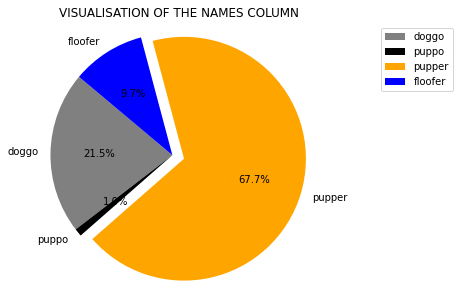

In [256]:
# Visualisation of the dog_types
groupedlabels = ['doggo', 'puppo', 'pupper', 'floofer']
colors = ['grey', 'black', 'orange', 'blue']
explode = (0, 0, 0.1, 0)

plt.pie(grouped, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%',startangle=140)

plt.title('VISUALISATION OF THE NAMES COLUMN')
plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches(5,5);
plt.legend(['doggo', 'puppo', 'pupper', 'floofer'],bbox_to_anchor=(1, 0, 0.5, 1))

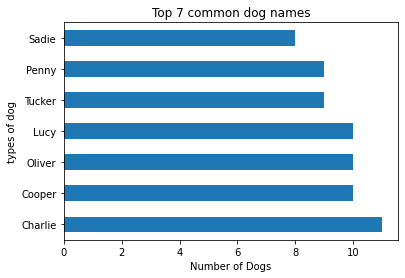

In [257]:
# Histogram to visualize dog types

clean_merge['name'].value_counts()[1:8].plot(kind = 'barh')
plt.title('Top 7 common dog names')
plt.xlabel('Number of Dogs')
plt.ylabel('types of dog');

## INSIGHTS
1. pupper has the highest percentage for the breed of dogs
2. poppo has the lowest percentage for the breed of dogs
3. charlie is the most common name for the dogs